In [2]:
# Example importing the CSV here

import pandas as pd


dataframe = pd.read_csv("/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/PROVINCIAS/csv_1500_prov/A Coruña.csv")
dataframe.head()

,com. autonoma,provincia,descripción,precio,habitaciones,m²
0,Galicia,A Coruña,Piso,249000,4,291
1,Galicia,A Coruña,Chalet,630000,4,250
2,Galicia,A Coruña,Chalet,275000,6,218
3,Galicia,A Coruña,Piso,250000,3,75
4,Galicia,A Coruña,Piso,175000,3,182


In [3]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

['com. autonoma', 'provincia', 'descripción']
['precio', 'habitaciones', 'm²']


In [4]:
# Obtener las dimensiones
dataframe.shape

(370, 6)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   com. autonoma  370 non-null    object
 1   provincia      370 non-null    object
 2   descripción    370 non-null    object
 3   precio         370 non-null    int64 
 4   habitaciones   370 non-null    int64 
 5   m²             370 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 17.5+ KB


In [6]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [7]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

<Axes: >

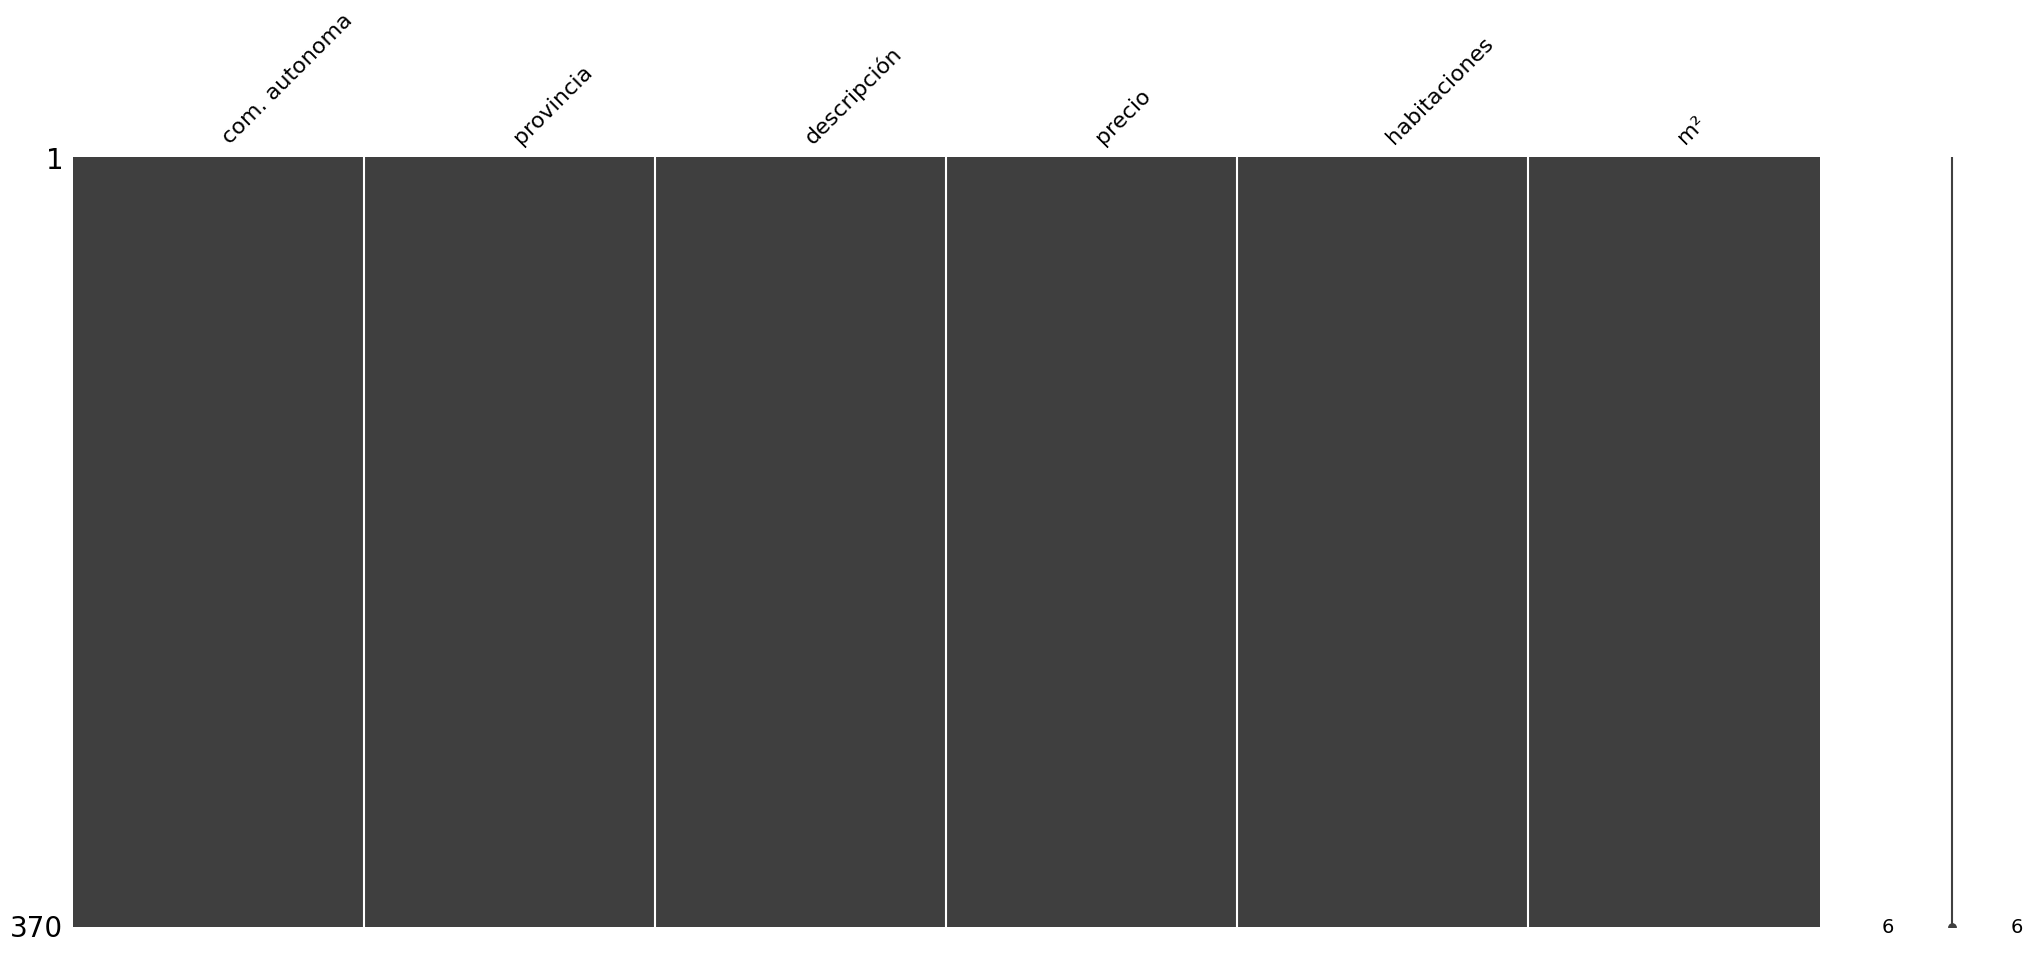

In [8]:
import missingno as msno

# Visualizar la matriz de valores faltantes
msno.matrix(dataframe)


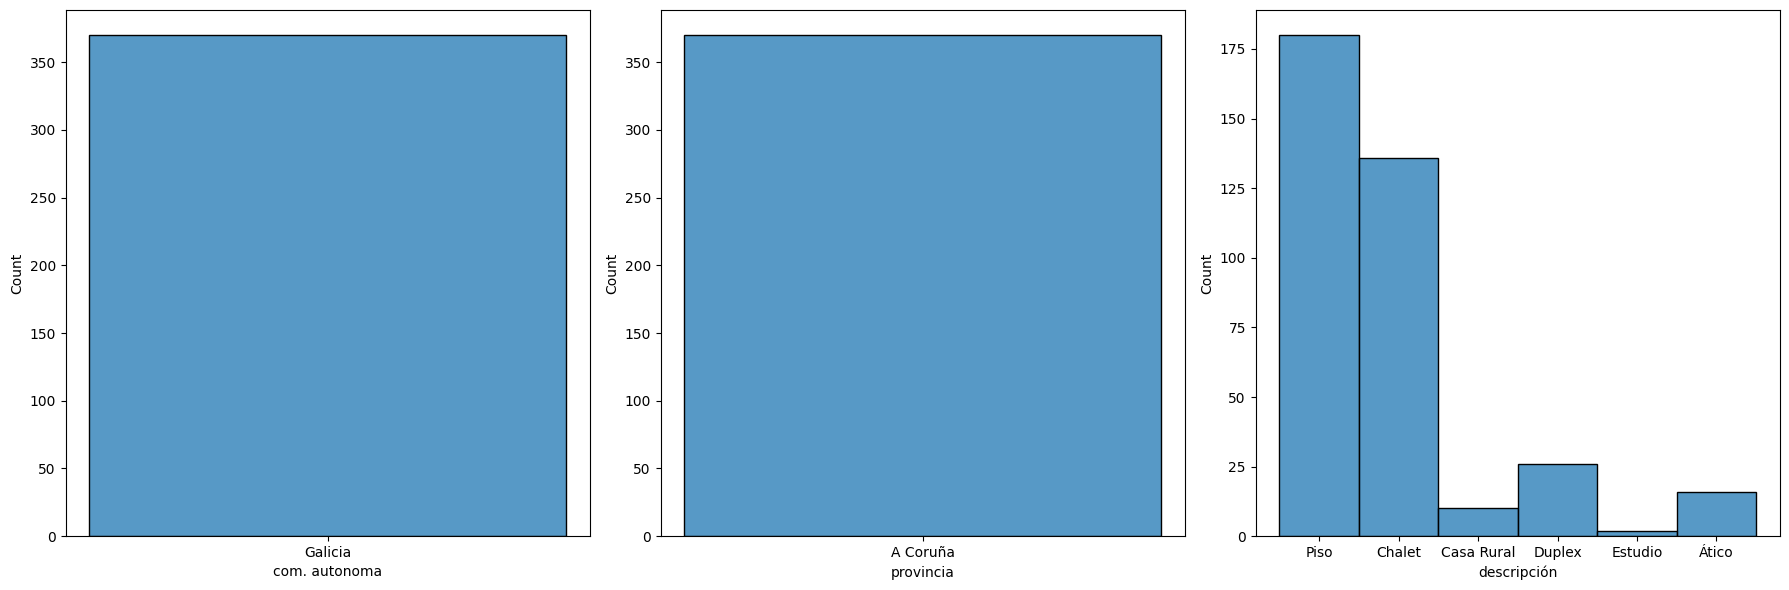

In [9]:
#Análisis sobre variables categóricas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Crear histograma
sns.histplot(ax=axes[0], data=dataframe, x='com. autonoma')
sns.histplot(ax=axes[1], data=dataframe, x='provincia')
sns.histplot(ax=axes[2], data=dataframe, x='descripción')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico    
plt.show()

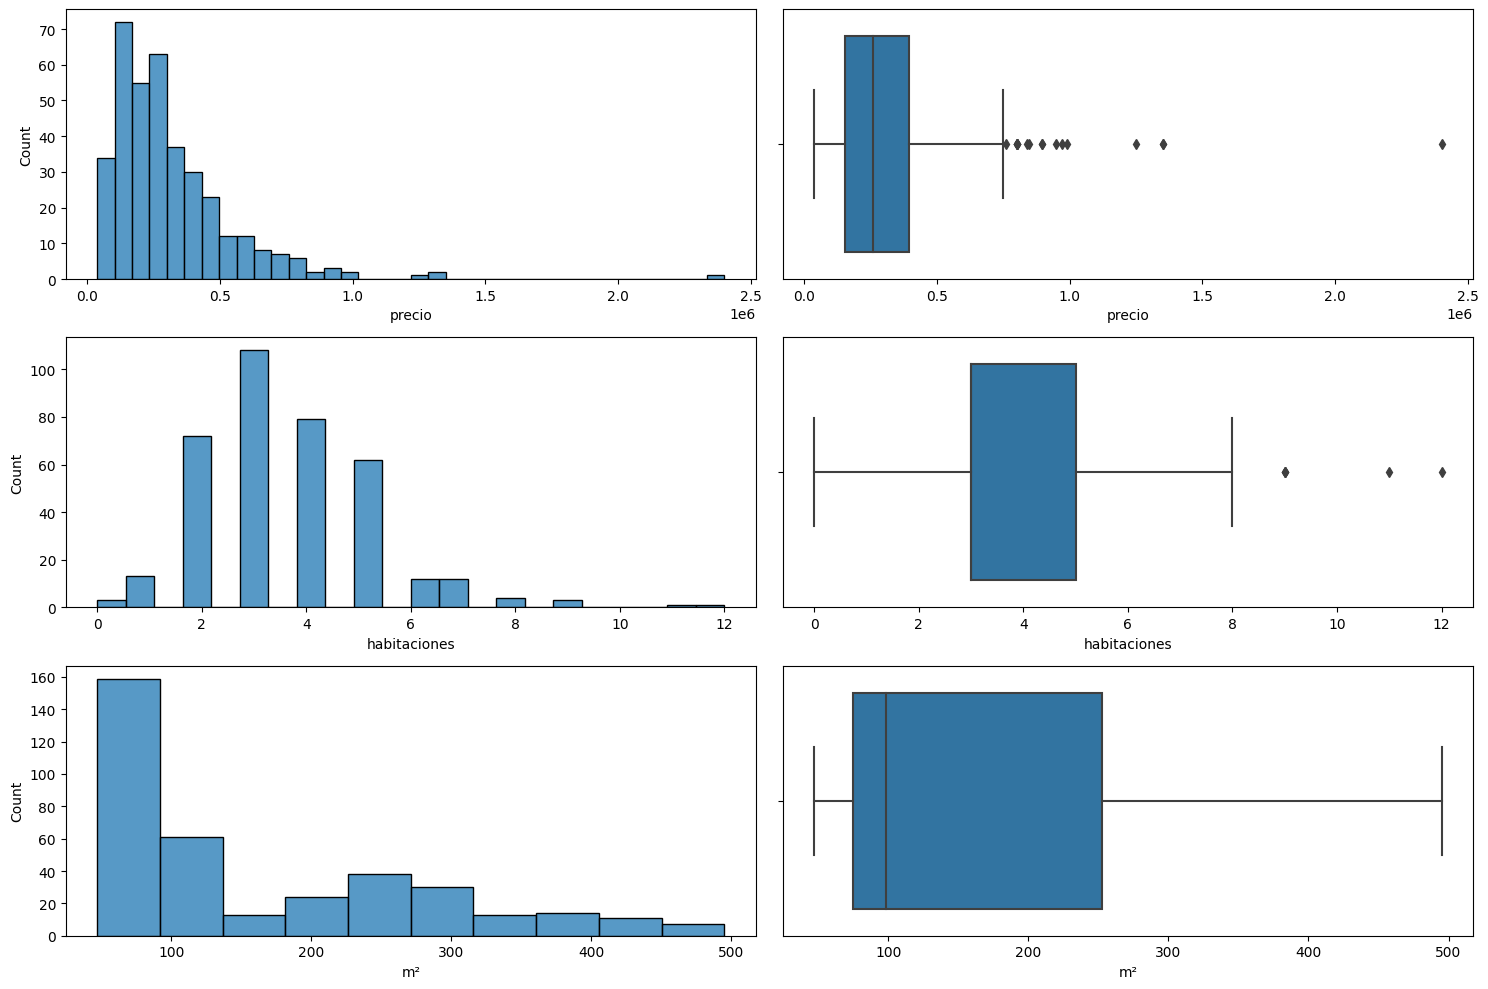

In [10]:
#Análisis sobre variables numericas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 10 filas y 2 columnas
fig, axis = plt.subplots(3, 2, figsize=(15, 10))

# Gráficos de las nuevas variables numéricas
sns.histplot(ax=axis[0, 0], data=dataframe, x="precio")
sns.boxplot(ax=axis[0, 1], data=dataframe, x="precio")
sns.histplot(ax=axis[1, 0], data=dataframe, x="habitaciones")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="habitaciones")
sns.histplot(ax=axis[2, 0], data=dataframe, x="m²")
sns.boxplot(ax=axis[2, 1], data=dataframe, x="m²")

# Ajustar el layout        
plt.tight_layout()

# Mostrar el plot
plt.show()

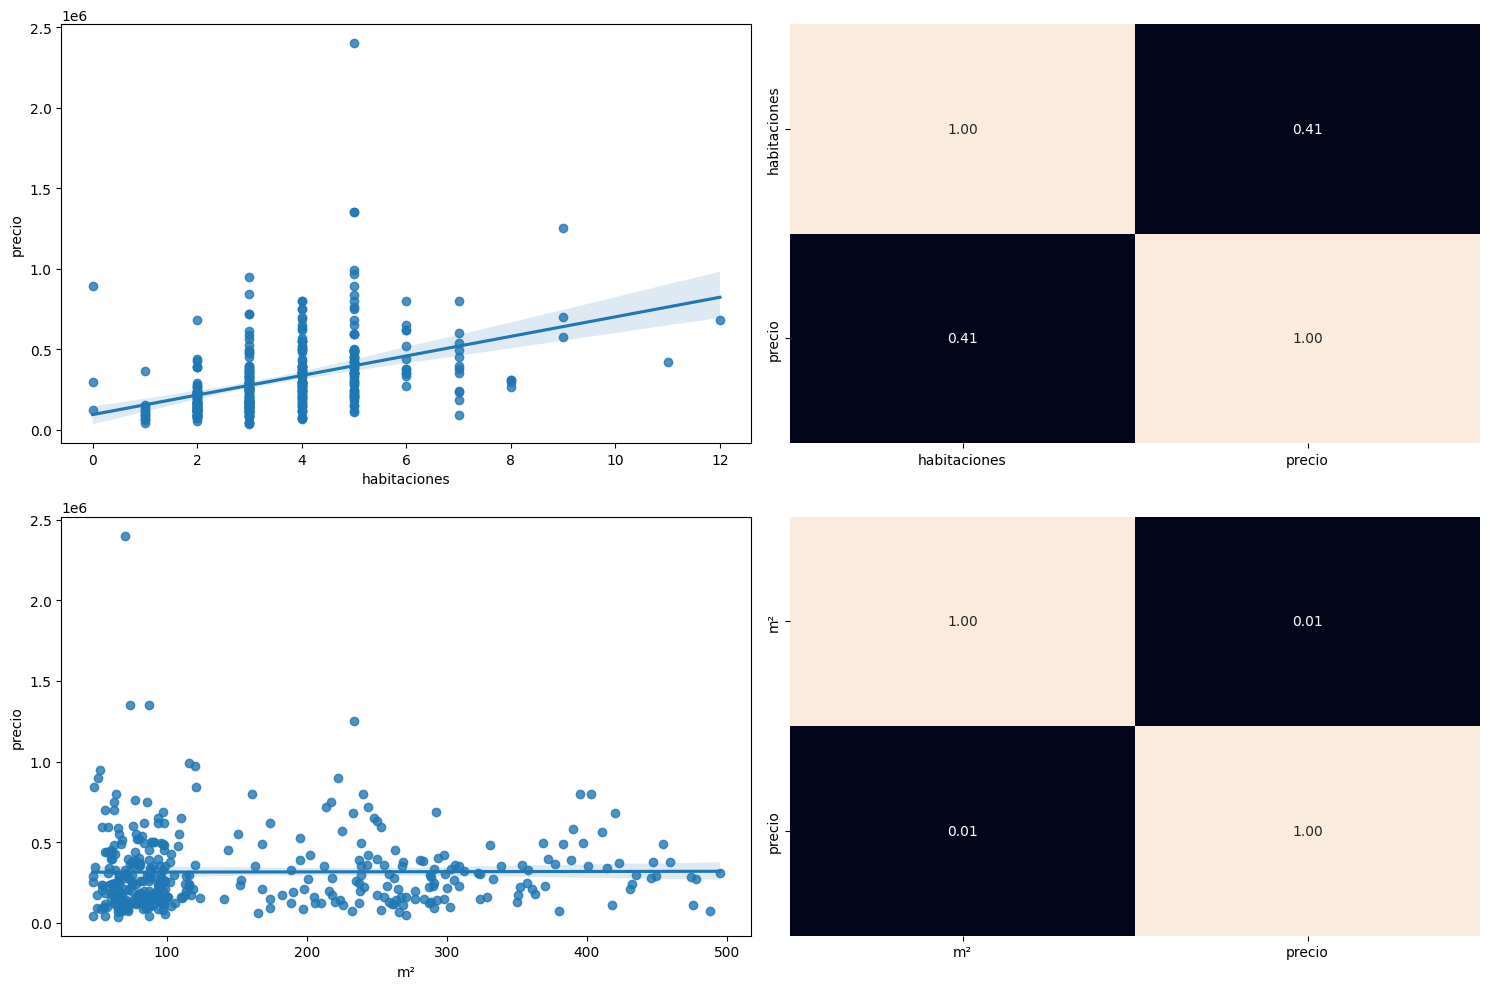

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 2 filas y 2 columnas
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

sns.regplot(ax=axis[0, 0], data=dataframe, x="habitaciones", y="precio")
sns.heatmap(dataframe[["habitaciones", "precio"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)
axis[1, 0].set_ylabel("precio")

sns.regplot(ax=axis[1, 0], data=dataframe, x="m²", y="precio")
sns.heatmap(dataframe[["m²", "precio"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


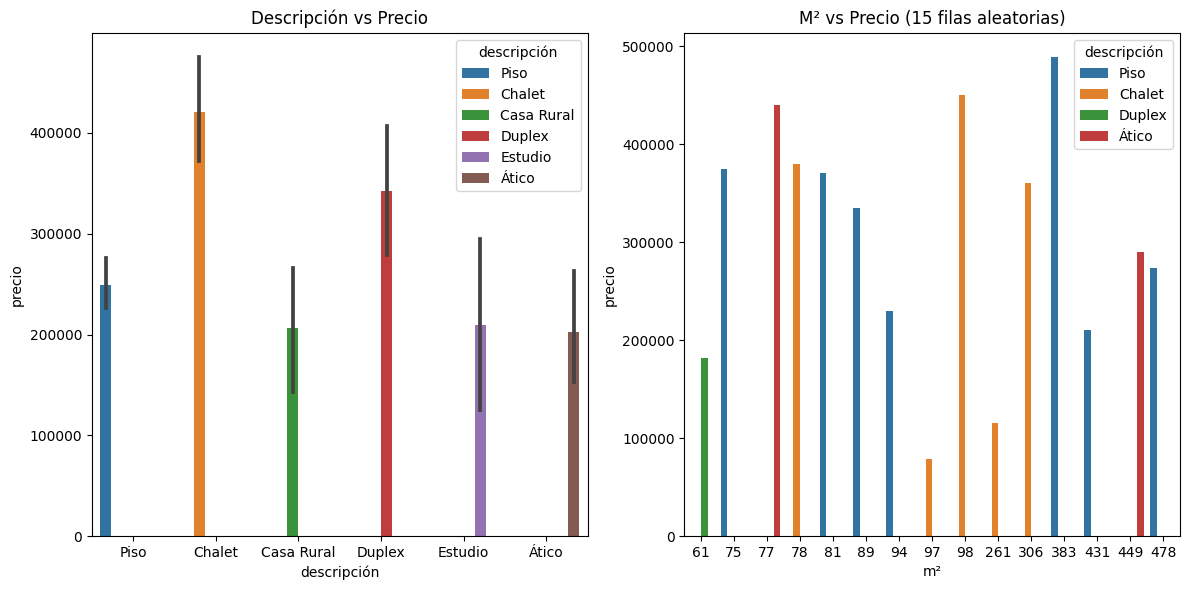

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Seleccionar 15 filas aleatorias del DataFrame
random_rows = dataframe.sample(15, random_state=42)

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(figsize=(12, 6), ncols=2)

# Gráfico de barras para 'descripción' vs 'precio'
sns.barplot(ax=axes[0], data=dataframe, x='descripción', y='precio', hue='descripción')
axes[0].set_title('Descripción vs Precio')

# Gráfico de barras para 30 filas aleatorias de 'm²' vs 'precio'
sns.barplot(ax=axes[1], data=random_rows, x='m²', y='precio', hue='descripción')
axes[1].set_title('M² vs Precio (15 filas aleatorias)')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [13]:
import pandas as pd

# Convertir las columnas categóricas a numéricas usando factorize
dataframe_copy = dataframe.copy()
categorical_columns = dataframe_copy.select_dtypes(include=['object']).columns

for column in categorical_columns:
    dataframe_copy[column] = pd.factorize(dataframe_copy[column])[0]

# Calcular la correlación entre todas las columnas
correlation_matrix = dataframe_copy.corr()

# Reemplazar los NaN en la matriz de correlación con ceros
correlation_matrix = correlation_matrix.fillna(0)

# Mostrar la matriz de correlación
print(correlation_matrix)


               com. autonoma  provincia  descripción    precio  habitaciones  \
com. autonoma            0.0        0.0     0.000000  0.000000      0.000000   
provincia                0.0        0.0     0.000000  0.000000      0.000000   
descripción              0.0        0.0     1.000000  0.040263     -0.000691   
precio                   0.0        0.0     0.040263  1.000000      0.414903   
habitaciones             0.0        0.0    -0.000691  0.414903      1.000000   
m²                       0.0        0.0    -0.033766  0.006013      0.048653   

                     m²  
com. autonoma  0.000000  
provincia      0.000000  
descripción   -0.033766  
precio         0.006013  
habitaciones   0.048653  
m²             1.000000  


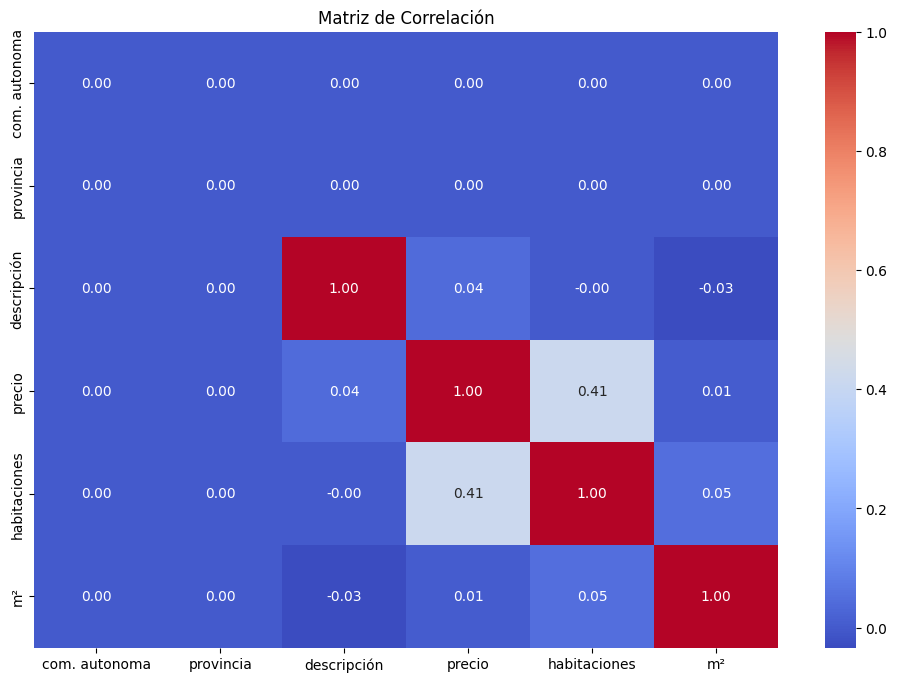

In [14]:
# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Añadir un título al gráfico
plt.title("Matriz de Correlación")

# Mostrar el mapa de calor
plt.show()

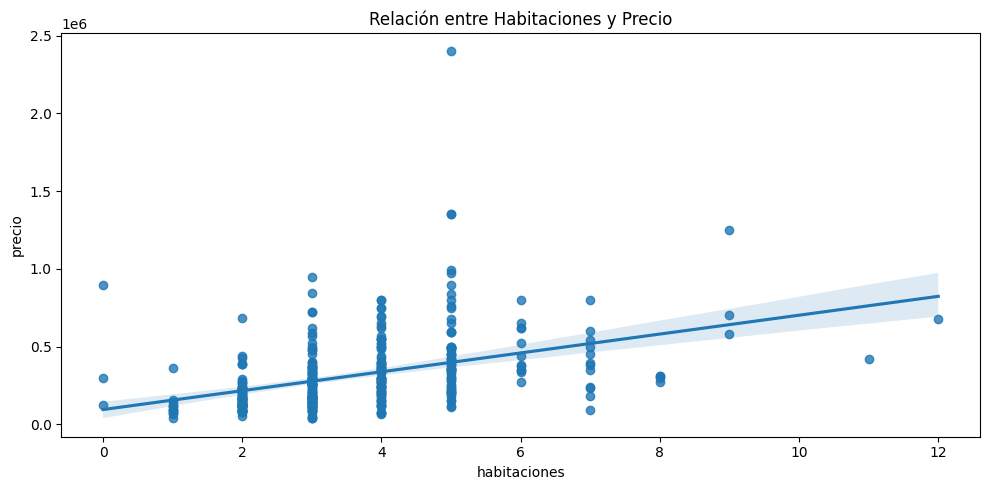

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con un solo subplot
fig, axis = plt.subplots(figsize=(10, 5))

# Graficar el scatter plot para "habitaciones" vs "precio"
sns.regplot(data=dataframe, x="habitaciones", y="precio")

# Añadir un título al gráfico
plt.title("Relación entre Habitaciones y Precio")

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


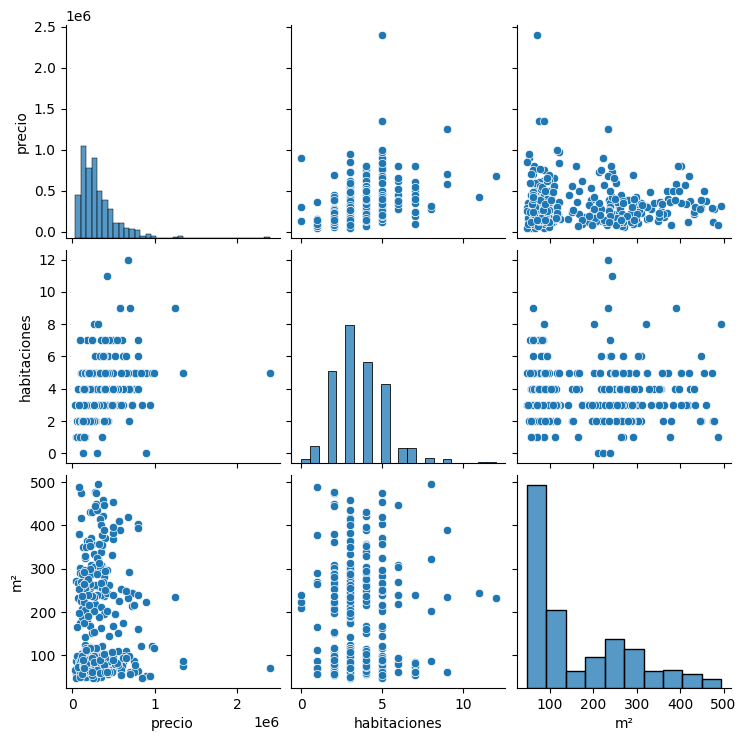

In [16]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


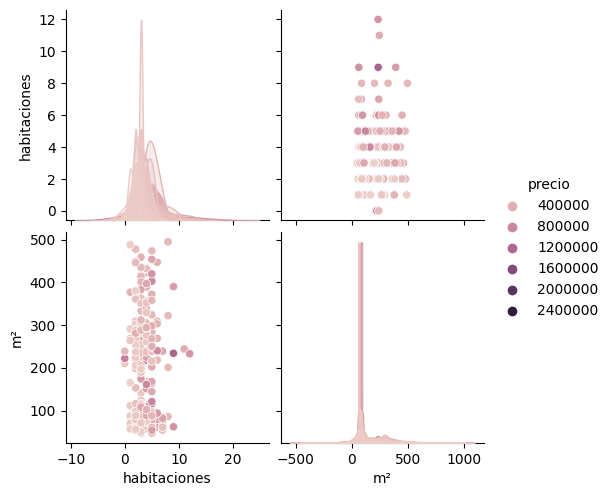

In [17]:
sns.pairplot(dataframe, hue='precio')

In [18]:
#análisis descriptivo

# Establecer el formato de punto flotante
pd.options.display.float_format = '{:.2f}'.format

# Realizar el análisis descriptivo
dataframe.describe()



,precio,habitaciones,m²
count,370.00,370.00,370.00
mean,315345.76,3.64,164.39
std,238618.14,1.63,116.19
min,38000.00,0.00,47.00
25%,155000.00,3.00,75.00
50%,259000.00,3.00,98.00
75%,393750.00,5.00,252.25
max,2400000.00,12.00,495.00


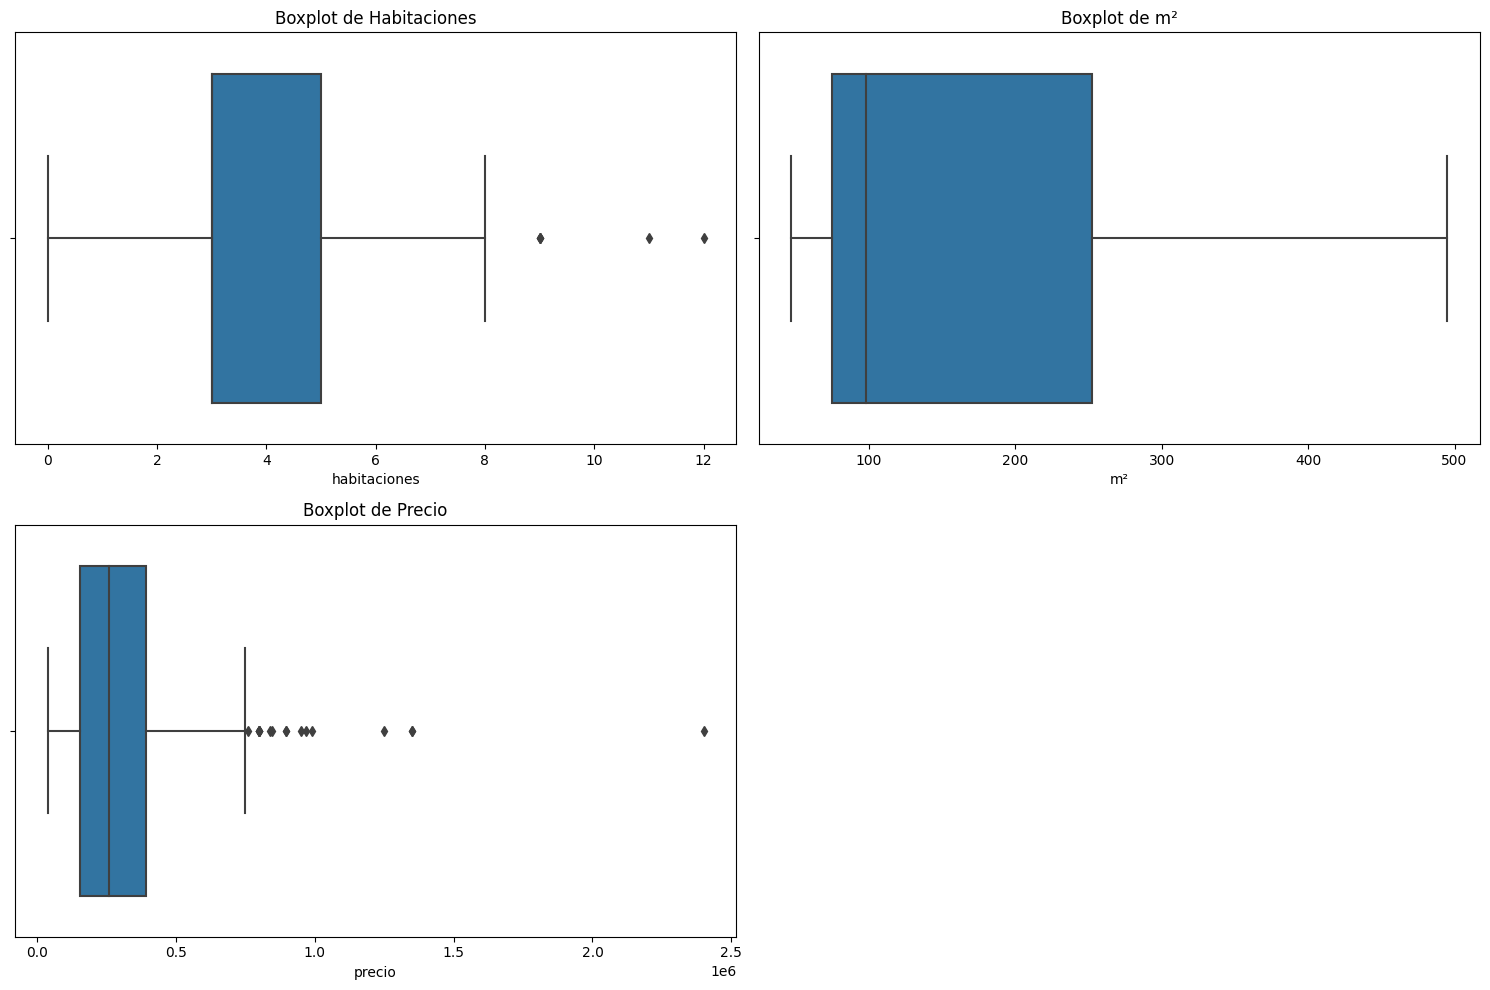

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Boxplot para 'habitaciones'
sns.boxplot(ax=axes[0, 0], data=dataframe, x='habitaciones')
axes[0, 0].set_title('Boxplot de Habitaciones')

# Boxplot para 'm²'
sns.boxplot(ax=axes[0, 1], data=dataframe, x='m²')
axes[0, 1].set_title('Boxplot de m²')

# Boxplot para 'precio'
sns.boxplot(ax=axes[1, 0], data=dataframe, x='precio')
axes[1, 0].set_title('Boxplot de Precio')

# Eliminar el cuadro de abajo a la derecha
fig.delaxes(axes[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [20]:
# Variables seleccionadas
selected_variables = ['habitaciones', 'm²', 'precio']

for variable in selected_variables:
    variable_stats = dataframe[variable].describe()
    print(variable_stats)

    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr

    print(f"- Los límites superior e inferior para la búsqueda de outliers en {variable} son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(variable_iqr, 2)}\n")


count   370.00
mean      3.64
std       1.63
min       0.00
25%       3.00
50%       3.00
75%       5.00
max      12.00
Name: habitaciones, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en habitaciones son 8.0 y 0.0, con un rango intercuartílico de 2.0

count   370.00
mean    164.39
std     116.19
min      47.00
25%      75.00
50%      98.00
75%     252.25
max     495.00
Name: m², dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en m² son 518.12 y -190.88, con un rango intercuartílico de 177.25

count       370.00
mean     315345.76
std      238618.14
min       38000.00
25%      155000.00
50%      259000.00
75%      393750.00
max     2400000.00
Name: precio, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en precio son 751875.0 y -203125.0, con un rango intercuartílico de 238750.0



In [21]:
#Análisis de valores faltantes

dataframe.isnull().sum()

com. autonoma    0
provincia        0
descripción      0
precio           0
habitaciones     0
m²               0
dtype: int64

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Variables seleccionadas
selected_variables = ['habitaciones', 'm²', 'precio']

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Escalar las variables seleccionadas
scaled_features = scaler.fit_transform(dataframe[selected_variables])

# Crear un DataFrame con las variables escaladas
dataframe_scal = pd.DataFrame(scaled_features, index=dataframe.index, columns=selected_variables)

# Mostrar las primeras filas del DataFrame escalado
print(dataframe_scal.head())


   habitaciones   m²  precio
0          0.33 0.54    0.09
1          0.33 0.45    0.25
2          0.50 0.38    0.10
3          0.25 0.06    0.09
4          0.25 0.30    0.06


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Leer los datos
data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/PROVINCIAS/csv_1500_prov/A Coruña.csv')

# Seleccionar las características y la variable objetivo
selected_columns = ['habitaciones', 'm²', 'precio']
data = data[selected_columns]

# Dividir los datos en características (X) y variable objetivo (y)
X = data.drop('precio', axis=1)
y = data['precio']

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir los conjuntos de entrenamiento y prueba
print("Conjunto de Entrenamiento (X_train):")
print(X_train.head())

print("\nConjunto de Prueba (X_test):")
print(X_test.head())

print("\nVariable Objetivo de Entrenamiento (y_train):")
print(y_train.head())

print("\nVariable Objetivo de Prueba (y_test):")
print(y_test.head())


Conjunto de Entrenamiento (X_train):
     habitaciones   m²
345             2   56
192             3  263
75              2   94
84              3   72
358             7   61

Conjunto de Prueba (X_test):
     habitaciones   m²
327             3  383
33              4  431
15              5   98
314             5   78
57              3   97

Variable Objetivo de Entrenamiento (y_train):
345    115000
192    450000
75      87000
84     205000
358    240000
Name: precio, dtype: int64

Variable Objetivo de Prueba (y_test):
327    489000
33     210000
15     450000
314    380000
57      79000
Name: precio, dtype: int64


In [25]:
# Añadir la columna "precio" a los conjuntos de entrenamiento y prueba
X_train["precio"] = y_train.values
X_test["precio"] = y_test.values

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
X_train.to_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/clean_train_A Coruña.csv', index=False)
X_test.to_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/clean_test_A Coruña.csv', index=False)


---

RANDOM FOREST


In [27]:
#Paso 1. Lectura del conjunto de datos procesado¶


import pandas as pd

train_data = pd.read_csv("/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/PROVINCIAS/csv_train_test/clean_train_A Coruña.csv")
test_data = pd.read_csv("/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/PROVINCIAS/csv_train_test/clean_test_A Coruña.csv")

train_data.head()


,habitaciones,m²,precio
0,2,56,115000
1,3,263,450000
2,2,94,87000
3,3,72,205000
4,7,61,240000


In [28]:
X_train = train_data.drop(["precio"], axis = 1)
y_train = train_data["precio"]
X_test = test_data.drop(["precio"], axis = 1)
y_test = test_data["precio"]

In [29]:
#Paso 2: Inicialización y entrenamiento del modelo
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
#Paso 3: Predicción del modelo

y_pred = model.predict(X_test)
y_pred



array([423338.        , 305336.        , 472640.        , 390308.        ,
       264491.        , 247712.33333333, 246632.        , 196421.58333333,
       248344.        , 322785.        , 207810.        , 428765.        ,
       145640.        , 227580.        , 309225.        , 281495.83733333,
       503030.        , 156144.76190476, 485573.96666667, 323152.46666667,
       539816.23333333, 553422.66666667, 393768.33333333, 302040.        ,
       481615.        , 398210.        , 239970.        , 315386.19047619,
       249682.33333333, 347900.        , 363593.66666667, 316353.        ,
       214753.33333333, 325841.33333333, 154103.48      , 239970.        ,
       169450.        , 205620.        , 229234.        , 324040.        ,
       264491.        , 515420.        , 383543.        , 101430.        ,
       265470.        , 261990.        , 240718.        , 367427.39333333,
       329941.33333333, 419571.        , 423177.136     , 198614.5       ,
       176290.        , 1

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print("Coeficiente de Determinación (R^2):", r2_score(y_test, y_pred))


Error cuadrático medio: 28391859708.45799
Coeficiente de Determinación (R^2): -0.05933826240423645


In [32]:
#Paso 4: Guardado del modelo
from pickle  import dump


dump(model, open("random_forest_regressor_default_42.sav", "wb"))


---

gridsearch

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Definir el modelo de Random Forest
model = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'n_estimators': [50, 100, 200],  # Prueba con diferentes números de estimadores
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras en un nodo hoja
}

# Realizar una búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en los datos de prueba
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo con el mejor conjunto de hiperparámetros
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mejores hiperparámetros: {best_params}")
print(f"Test MSE con mejores hiperparámetros: {mse}")
print("Coeficiente de Determinación (R^2):", r2_score(y_test, y_pred))



Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Test MSE con mejores hiperparámetros: 22276464225.740612
Coeficiente de Determinación (R^2): 0.16883532295081694


---


RANDOMSEARCH

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from joblib import load  # Importar load desde joblib
import numpy as np

# Cargamos el modelo preentrenado usando joblib
model = load("/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/models/random_forest_regressor_default_42.sav")

# Definimos el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inicializamos RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=100,  # Número de combinaciones aleatorias a probar
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Utiliza todos los núcleos de CPU disponibles
)

# Realizamos la búsqueda en cuadrícula en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Obtenemos el mejor modelo
best_model = random_search.best_estimator_

# Realizamos predicciones en los datos de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calculamos el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Mostramos los resultados
print("Test MSE con mejores hiperparámetros:", mse)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Test MSE con mejores hiperparámetros: 21281100535.354298


/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
53 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.loc

---


xgboost

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos de entrenamiento y prueba
train_data = pd.read_csv("/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/clean_train_A Coruña.csv")
test_data = pd.read_csv("/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/clean_test_A Coruña.csv")

# Separar las características (X) y el objetivo (y) en los datos de entrenamiento y prueba
X_train = train_data.drop("precio", axis=1)
y_train = train_data["precio"]
X_test = test_data.drop("precio", axis=1)
y_test = test_data["precio"]

# Crear un objeto DMatrix para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir los hiperparámetros del modelo XGBoost
params = {
    'objective': 'reg:squarederror',  # Regresión
    'max_depth': 6,                   # Profundidad máxima del árbol
    'eta': 0.1,                       # Tasa de aprendizaje
    'subsample': 0.8,                # Submuestreo de filas
    'colsample_bytree': 0.8,         # Submuestreo de columnas
    'eval_metric': 'rmse'             # Métrica de evaluación
}

# Entrenar el modelo XGBoost
num_round = 100  # Número de rondas de entrenamiento
model = xgb.train(params, dtrain, num_round)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(dtest)

# Calcular el Error Cuadrático Medio (MSE) y el coeficiente de determinación R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# Puedes guardar el modelo XGBoost entrenado si lo deseas
model.save_model("xgboost_model_A Coruña.model")


Error Cuadrático Medio (MSE): 0.03023089050292879
Coeficiente de Determinación (R^2): -0.026181611308554675


randomsearch

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Cargar los datos de entrenamiento y prueba
train_data = pd.read_csv("/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/clean_train_A Coruña.csv")
test_data = pd.read_csv("/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_train_test/clean_test_A Coruña.csv")

# Dividir los datos en características (X) y etiquetas (y)
X_train = train_data.drop('precio', axis=1)
y_train = train_data['precio']
X_test = test_data.drop('precio', axis=1)
y_test = test_data['precio']

# Definir el modelo XGBoost
model = xgb.XGBRegressor()

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4],
}

# Inicializar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=5, verbose=2, random_state=42, n_jobs=-1
)

# Realizar la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Obtener el mejor modelo
best_model = random_search.best_estimator_

# Realizar predicciones en los datos de prueba
y_pred = best_model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) en los datos de prueba
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print(f"Test MSE con mejores hiperparámetros: {mse}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.2, reg_lambda=0.4, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.2, reg_lambda=0.4, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.2, reg_lambda=0.4, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.2, reg_lambda=0.4, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, reg_alpha=0.4, reg_lambda=0.3, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.4, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.2, reg_lambda=0.4, subsample=0.9; total tim